#　線形SVM

#### データセットの生成

In [2]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                   n_redundant=0,n_classes=2,
                                   random_state=7816)

In [4]:
X.shape, y.shape

#### データセットの可視化

Text(0, 0.5, 'y value')

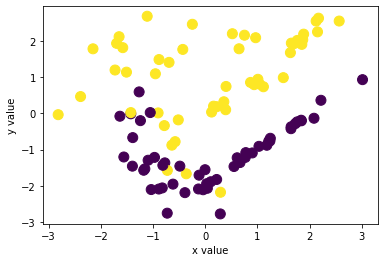

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x value')
plt.ylabel('y value')

#### データセットの前処理

In [6]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1

In [22]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### サポートベクタマシンの構築

In [23]:
import cv2
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [24]:
_, y_pred = svm.predict(X_test)

In [25]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

#### 決定境界の可視化

In [28]:
def plot_decision_boundary(svm, X_test, y_test):
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1 
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

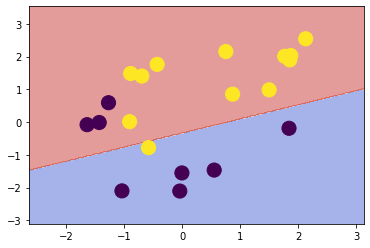

In [29]:
plot_decision_boundary(svm, X_test, y_test)